In [1]:
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as im

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/Image Classification/train"
training_data = []
class_names=[]
for dirc in os.listdir(path):
    new = os.path.join(path, dirc)
    for img in os.listdir(new):
        class_names.append(dirc)

In [4]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model

In [5]:
#dataset loading
path = "/content/drive/MyDrive/Image Classification/train"
from posixpath import pathsep
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.3)

# Note that the validation data should not be augmented!
#test_datagen = ImageDataGenerator( rescale = 1.0/255, subset='validation')

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(path,
                                                    batch_size = 20,
                                                    target_size = (220, 220),
                                                    class_mode='categorical'
                                                    ,subset='training')     
test_generator = train_datagen.flow_from_directory(path,
                                                    batch_size = 20,
                                                    target_size = (220, 220)
                                                    ,class_mode='categorical'
                                                    ,subset='validation') 


Found 3940 images belonging to 94 classes.
Found 1657 images belonging to 94 classes.


<h1>VGG16

In [ ]:
#VGG16
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(220,220,3))
base_model.trainable = False ## Not trainable weights

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
#Buiding model
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(128, activation='relu')
dense_layer_2 = layers.Dense(256, activation='relu')
prediction_layer = layers.Dense(94, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [ ]:
#Compiling and training
from tensorflow.keras.callbacks import EarlyStopping

model.compile(    
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
#callbacks = myCallback()

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10,  restore_best_weights=True)

history = model.fit(
            train_generator,
            validation_data = test_generator,
            steps_per_epoch = 5,
            epochs = 100,
            validation_steps = 10,
            verbose = 2,
            callbacks=[es])

Epoch 1/100
5/5 - 35s - loss: 4.5678 - accuracy: 0.0300 - val_loss: 4.5640 - val_accuracy: 0.0150 - 35s/epoch - 7s/step
Epoch 2/100
5/5 - 60s - loss: 4.5399 - accuracy: 0.0000e+00 - val_loss: 4.5802 - val_accuracy: 0.0050 - 60s/epoch - 12s/step
Epoch 3/100
5/5 - 61s - loss: 4.4956 - accuracy: 0.0400 - val_loss: 4.5419 - val_accuracy: 0.0500 - 61s/epoch - 12s/step
Epoch 4/100
5/5 - 61s - loss: 4.5600 - accuracy: 0.0200 - val_loss: 4.5711 - val_accuracy: 0.0150 - 61s/epoch - 12s/step
Epoch 5/100
5/5 - 44s - loss: 4.5132 - accuracy: 0.0200 - val_loss: 4.5180 - val_accuracy: 0.0200 - 44s/epoch - 9s/step
Epoch 6/100
5/5 - 41s - loss: 4.5274 - accuracy: 0.0300 - val_loss: 4.5025 - val_accuracy: 0.0150 - 41s/epoch - 8s/step
Epoch 7/100
5/5 - 37s - loss: 4.4954 - accuracy: 0.0200 - val_loss: 4.5061 - val_accuracy: 0.0100 - 37s/epoch - 7s/step
Epoch 8/100
5/5 - 39s - loss: 4.4375 - accuracy: 0.0300 - val_loss: 4.4719 - val_accuracy: 0.0450 - 39s/epoch - 8s/step
Epoch 9/100
5/5 - 33s - loss: 4.4

In [ ]:
import pandas as pd
import h5py

hist_df = pd.DataFrame(history.history) 
hist_csv_file = '/content/drive/MyDrive/ml lab/Results(CSV)/vgg16.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

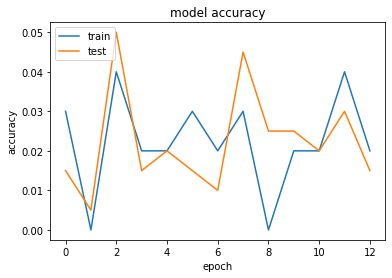

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model.save('/content/drive/MyDrive/ml lab/Converged Models/vgg16.h5')

<h1>VGG19

In [ ]:
#VGG19
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input

## Loading VGG19 model
base_model = VGG19(weights="imagenet", include_top=False, input_shape=(220,220,3))
base_model.trainable = False ## Not trainable weights

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
#Buiding model
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(128, activation='relu')
dense_layer_2 = layers.Dense(256, activation='relu')
prediction_layer = layers.Dense(94, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [ ]:
#Compiling and training
from tensorflow.keras.callbacks import EarlyStopping

model.compile(    
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
#callbacks = myCallback()

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10,  restore_best_weights=True)

history = model.fit(
            train_generator,
            validation_data = test_generator,
            steps_per_epoch = 5,
            epochs = 100,
            validation_steps = 10,
            verbose = 2,
            callbacks=[es])

Epoch 1/100
5/5 - 26s - loss: 5.0364 - accuracy: 0.0000e+00 - val_loss: 4.8993 - val_accuracy: 0.0050 - 26s/epoch - 5s/step
Epoch 2/100
5/5 - 26s - loss: 4.9521 - accuracy: 0.0000e+00 - val_loss: 4.6814 - val_accuracy: 0.0050 - 26s/epoch - 5s/step
Epoch 3/100
5/5 - 24s - loss: 4.6298 - accuracy: 0.0000e+00 - val_loss: 4.5478 - val_accuracy: 0.0200 - 24s/epoch - 5s/step
Epoch 4/100
5/5 - 23s - loss: 4.5684 - accuracy: 0.0100 - val_loss: 4.5367 - val_accuracy: 0.0050 - 23s/epoch - 5s/step
Epoch 5/100
5/5 - 22s - loss: 4.5625 - accuracy: 0.0200 - val_loss: 4.5100 - val_accuracy: 0.0100 - 22s/epoch - 4s/step
Epoch 6/100
5/5 - 22s - loss: 4.5463 - accuracy: 0.0100 - val_loss: 4.5442 - val_accuracy: 0.0000e+00 - 22s/epoch - 4s/step
Epoch 7/100
5/5 - 17s - loss: 4.4777 - accuracy: 0.0000e+00 - val_loss: 4.5255 - val_accuracy: 0.0100 - 17s/epoch - 3s/step
Epoch 8/100
5/5 - 19s - loss: 4.5594 - accuracy: 0.0100 - val_loss: 4.5174 - val_accuracy: 0.0150 - 19s/epoch - 4s/step
Epoch 9/100
5/5 - 18

In [ ]:
import pandas as pd
import h5py

hist_df = pd.DataFrame(history.history) 
hist_csv_file = '/content/drive/MyDrive/ml lab/Results(CSV)/vgg19.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

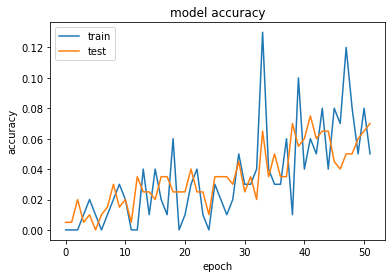

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model.save('/content/drive/MyDrive/ml lab/Converged Models/vgg19.h5')

<h1>INCEPTIONV3

In [ ]:
#InceptionV3
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

## Loading InceptionV3 model
base_model = InceptionV3(weights="imagenet", include_top=False, input_shape=(220,220,3))
base_model.trainable = False ## Not trainable weights

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
#Buiding model
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(128, activation='relu')
dense_layer_2 = layers.Dense(256, activation='relu')
prediction_layer = layers.Dense(94, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [ ]:
#Compiling and training
from tensorflow.keras.callbacks import EarlyStopping

model.compile(    
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
#callbacks = myCallback()

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10,  restore_best_weights=True)

history = model.fit(
            train_generator,
            validation_data = test_generator,
            steps_per_epoch = 5,
            epochs = 100,
            validation_steps = 10,
            verbose = 2,
            callbacks=[es])

Epoch 1/100
5/5 - 14s - loss: 11.3611 - accuracy: 0.0000e+00 - val_loss: 13.3583 - val_accuracy: 0.0050 - 14s/epoch - 3s/step
Epoch 2/100
5/5 - 8s - loss: 10.5197 - accuracy: 0.0000e+00 - val_loss: 7.7742 - val_accuracy: 0.0050 - 8s/epoch - 2s/step
Epoch 3/100
5/5 - 8s - loss: 5.8607 - accuracy: 0.0500 - val_loss: 4.8661 - val_accuracy: 0.0300 - 8s/epoch - 2s/step
Epoch 4/100
5/5 - 6s - loss: 4.7377 - accuracy: 0.0300 - val_loss: 4.5789 - val_accuracy: 0.0200 - 6s/epoch - 1s/step
Epoch 5/100
5/5 - 7s - loss: 4.5664 - accuracy: 0.0500 - val_loss: 4.5672 - val_accuracy: 0.0250 - 7s/epoch - 1s/step
Epoch 6/100
5/5 - 6s - loss: 4.6033 - accuracy: 0.0100 - val_loss: 4.5391 - val_accuracy: 0.0250 - 6s/epoch - 1s/step
Epoch 7/100
5/5 - 7s - loss: 4.5186 - accuracy: 0.0100 - val_loss: 4.5330 - val_accuracy: 0.0150 - 7s/epoch - 1s/step
Epoch 8/100
5/5 - 7s - loss: 4.5425 - accuracy: 0.0100 - val_loss: 4.5262 - val_accuracy: 0.0150 - 7s/epoch - 1s/step
Epoch 9/100
5/5 - 6s - loss: 4.5019 - accur

In [ ]:
import pandas as pd
import h5py

hist_df = pd.DataFrame(history.history) 
hist_csv_file = '/content/drive/MyDrive/ml lab/Results(CSV)/InceptionV3.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

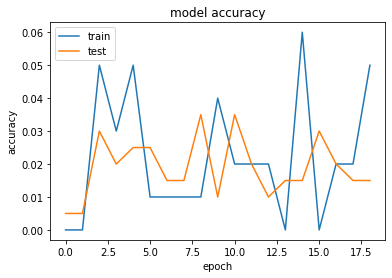

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model.save('/content/drive/MyDrive/ml lab/Converged Models/InceptionV3.h5')

<h1>INCEPTION RESNETV2

In [ ]:
#InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input

## Loading InceptionResNetV2 model
base_model = InceptionResNetV2(weights="imagenet", include_top=False, input_shape=(220,220,3))
base_model.trainable = False ## Not trainable weights

219070464/219055592 [==============================] - 1s 0us/step


In [ ]:
#Buiding model
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(128, activation='relu')
dense_layer_2 = layers.Dense(256, activation='relu')
prediction_layer = layers.Dense(94, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [ ]:
#Compiling and training
from tensorflow.keras.callbacks import EarlyStopping

model.compile(    
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
#callbacks = myCallback()

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10,  restore_best_weights=True)

history = model.fit(
            train_generator,
            validation_data = test_generator,
            steps_per_epoch = 5,
            epochs = 100,
            validation_steps = 10,
            verbose = 2,
            callbacks=[es])

Epoch 1/100
5/5 - 21s - loss: 10.3075 - accuracy: 0.0100 - val_loss: 9.7021 - val_accuracy: 0.0050 - 21s/epoch - 4s/step
Epoch 2/100
5/5 - 7s - loss: 7.9589 - accuracy: 0.0200 - val_loss: 5.8439 - val_accuracy: 0.0200 - 7s/epoch - 1s/step
Epoch 3/100
5/5 - 6s - loss: 4.9383 - accuracy: 0.0400 - val_loss: 4.5774 - val_accuracy: 0.0250 - 6s/epoch - 1s/step
Epoch 4/100
5/5 - 7s - loss: 4.6293 - accuracy: 0.0000e+00 - val_loss: 4.5052 - val_accuracy: 0.0300 - 7s/epoch - 1s/step
Epoch 5/100
5/5 - 7s - loss: 4.5356 - accuracy: 0.0200 - val_loss: 4.6218 - val_accuracy: 0.0200 - 7s/epoch - 1s/step
Epoch 6/100
5/5 - 6s - loss: 4.6112 - accuracy: 0.0000e+00 - val_loss: 4.5338 - val_accuracy: 0.0250 - 6s/epoch - 1s/step
Epoch 7/100
5/5 - 7s - loss: 4.5371 - accuracy: 0.0500 - val_loss: 4.5269 - val_accuracy: 0.0250 - 7s/epoch - 1s/step
Epoch 8/100
5/5 - 7s - loss: 4.5597 - accuracy: 0.0000e+00 - val_loss: 4.5021 - val_accuracy: 0.0200 - 7s/epoch - 1s/step
Epoch 9/100
5/5 - 7s - loss: 4.5239 - acc

In [ ]:
import pandas as pd
import h5py

hist_df = pd.DataFrame(history.history) 
hist_csv_file = '/content/drive/MyDrive/ml lab/Results(CSV)/InceptionResNetV2.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

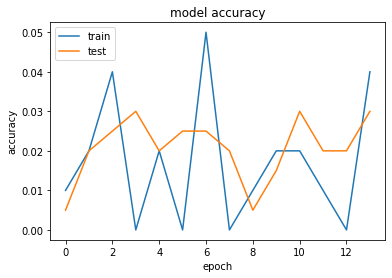

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model.save('/content/drive/MyDrive/ml lab/Converged Models/InceptionResNetV2.h5')

<h1>XCEPTION

In [ ]:
#Xception
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input

## Loading Xception model
base_model = Xception(weights="imagenet", include_top=False, input_shape=(220,220,3))
base_model.trainable = False ## Not trainable weights

83697664/83683744 [==============================] - 1s 0us/step


In [ ]:
#Buiding model
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(128, activation='relu')
dense_layer_2 = layers.Dense(256, activation='relu')
prediction_layer = layers.Dense(94, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [ ]:
#Compiling and training
from tensorflow.keras.callbacks import EarlyStopping

model.compile(    
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
#callbacks = myCallback()

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10,  restore_best_weights=True)

history = model.fit(
            train_generator,
            validation_data = test_generator,
            steps_per_epoch = 5,
            epochs = 100,
            validation_steps = 10,
            verbose = 2,
            callbacks=[es])

Epoch 1/100
5/5 - 11s - loss: 10.0705 - accuracy: 0.0200 - val_loss: 10.1402 - val_accuracy: 0.0200 - 11s/epoch - 2s/step
Epoch 2/100
5/5 - 7s - loss: 7.7301 - accuracy: 0.0500 - val_loss: 5.9992 - val_accuracy: 0.0650 - 7s/epoch - 1s/step
Epoch 3/100
5/5 - 6s - loss: 5.4818 - accuracy: 0.0100 - val_loss: 4.8646 - val_accuracy: 0.0050 - 6s/epoch - 1s/step
Epoch 4/100
5/5 - 6s - loss: 4.7752 - accuracy: 0.0000e+00 - val_loss: 4.5766 - val_accuracy: 0.0150 - 6s/epoch - 1s/step
Epoch 5/100
5/5 - 6s - loss: 4.5836 - accuracy: 0.0000e+00 - val_loss: 4.5316 - val_accuracy: 0.0200 - 6s/epoch - 1s/step
Epoch 6/100
5/5 - 6s - loss: 4.5782 - accuracy: 0.0000e+00 - val_loss: 4.5022 - val_accuracy: 0.0350 - 6s/epoch - 1s/step
Epoch 7/100
5/5 - 5s - loss: 4.4956 - accuracy: 0.0300 - val_loss: 4.4308 - val_accuracy: 0.0500 - 5s/epoch - 1s/step
Epoch 8/100
5/5 - 7s - loss: 4.4836 - accuracy: 0.0200 - val_loss: 4.4363 - val_accuracy: 0.0400 - 7s/epoch - 1s/step
Epoch 9/100
5/5 - 6s - loss: 4.4368 - ac

In [ ]:
import pandas as pd
import h5py

hist_df = pd.DataFrame(history.history) 
hist_csv_file = '/content/drive/MyDrive/ml lab/Results(CSV)/Xception.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

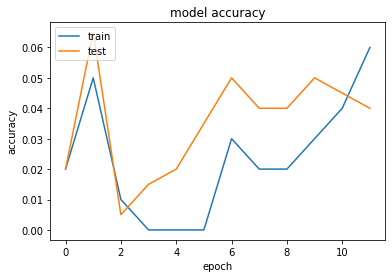

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model.save('/content/drive/MyDrive/ml lab/Converged Models/Xception.h5')

<h1>MobileNet

In [ ]:
#MobileNet
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input
base_model = MobileNet(weights="imagenet", include_top=False, input_shape=(220,220,3))
base_model.trainable = False ## Not trainable weights

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
#Buiding model
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(128, activation='relu')
dense_layer_2 = layers.Dense(256, activation='relu')
prediction_layer = layers.Dense(94, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [ ]:
#Compiling and training
from tensorflow.keras.callbacks import EarlyStopping

model.compile(    
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
#callbacks = myCallback()

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10,  restore_best_weights=True)

history = model.fit(
            train_generator,
            validation_data = test_generator,
            steps_per_epoch = 5,
            epochs = 100,
            validation_steps = 10,
            verbose = 2,
            callbacks=[es])

Epoch 1/100
5/5 - 7s - loss: 8.1413 - accuracy: 0.0200 - val_loss: 7.7367 - val_accuracy: 0.0300 - 7s/epoch - 1s/step
Epoch 2/100
5/5 - 5s - loss: 6.8153 - accuracy: 0.0400 - val_loss: 5.6426 - val_accuracy: 0.0200 - 5s/epoch - 913ms/step
Epoch 3/100
5/5 - 5s - loss: 4.9912 - accuracy: 0.0200 - val_loss: 4.5054 - val_accuracy: 0.0200 - 5s/epoch - 999ms/step
Epoch 4/100
5/5 - 5s - loss: 4.4940 - accuracy: 0.0500 - val_loss: 4.5658 - val_accuracy: 0.0100 - 5s/epoch - 1s/step
Epoch 5/100
5/5 - 4s - loss: 4.5744 - accuracy: 0.0100 - val_loss: 4.4895 - val_accuracy: 0.0200 - 4s/epoch - 877ms/step
Epoch 6/100
5/5 - 5s - loss: 4.5128 - accuracy: 0.0000e+00 - val_loss: 4.5156 - val_accuracy: 0.0100 - 5s/epoch - 1s/step
Epoch 7/100
5/5 - 5s - loss: 4.5366 - accuracy: 0.0000e+00 - val_loss: 4.5264 - val_accuracy: 0.0100 - 5s/epoch - 1s/step
Epoch 8/100
5/5 - 5s - loss: 4.4819 - accuracy: 0.0300 - val_loss: 4.5108 - val_accuracy: 0.0250 - 5s/epoch - 1s/step
Epoch 9/100
5/5 - 5s - loss: 4.5459 - a

In [ ]:
import pandas as pd
import h5py

hist_df = pd.DataFrame(history.history) 
hist_csv_file = '/content/drive/MyDrive/ml lab/Results(CSV)/MobileNet.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

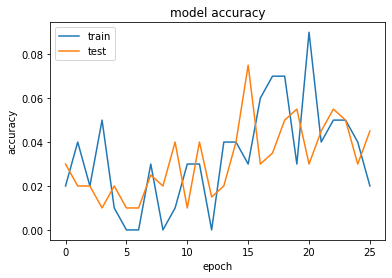

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model.save('/content/drive/MyDrive/ml lab/Converged Models/MobileNet.h5')

<h1>MobileNetV2

In [ ]:
#MobileNetV2
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.mobilenet_v2 import preprocess_input
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(220,220,3))
base_model.trainable = False ## Not trainable weights

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
#Buiding model
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(128, activation='relu')
dense_layer_2 = layers.Dense(256, activation='relu')
prediction_layer = layers.Dense(94, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [ ]:
#Compiling and training
from tensorflow.keras.callbacks import EarlyStopping

model.compile(    
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
#callbacks = myCallback()

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10,  restore_best_weights=True)

history = model.fit(
            train_generator,
            validation_data = test_generator,
            steps_per_epoch = 5,
            epochs = 100,
            validation_steps = 10,
            verbose = 2,
            callbacks=[es])

Epoch 1/100
5/5 - 8s - loss: 13.6052 - accuracy: 0.0200 - val_loss: 12.9258 - val_accuracy: 0.0250 - 8s/epoch - 2s/step
Epoch 2/100
5/5 - 5s - loss: 9.9478 - accuracy: 0.0200 - val_loss: 4.9883 - val_accuracy: 0.0100 - 5s/epoch - 1s/step
Epoch 3/100
5/5 - 5s - loss: 4.7351 - accuracy: 0.0200 - val_loss: 4.5369 - val_accuracy: 0.0200 - 5s/epoch - 940ms/step
Epoch 4/100
5/5 - 5s - loss: 4.5505 - accuracy: 0.0100 - val_loss: 4.5579 - val_accuracy: 0.0000e+00 - 5s/epoch - 911ms/step
Epoch 5/100
5/5 - 4s - loss: 4.5251 - accuracy: 0.0000e+00 - val_loss: 4.5696 - val_accuracy: 0.0200 - 4s/epoch - 872ms/step
Epoch 6/100
5/5 - 5s - loss: 4.6024 - accuracy: 0.0000e+00 - val_loss: 4.5381 - val_accuracy: 0.0200 - 5s/epoch - 928ms/step
Epoch 7/100
5/5 - 5s - loss: 4.5158 - accuracy: 0.0200 - val_loss: 4.5337 - val_accuracy: 0.0150 - 5s/epoch - 1s/step
Epoch 8/100
5/5 - 5s - loss: 4.5709 - accuracy: 0.0100 - val_loss: 4.5283 - val_accuracy: 0.0250 - 5s/epoch - 991ms/step
Epoch 9/100
5/5 - 5s - loss

In [ ]:
import pandas as pd
import h5py

hist_df = pd.DataFrame(history.history) 
hist_csv_file = '/content/drive/MyDrive/ml lab/Results(CSV)/MobileNetV2.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

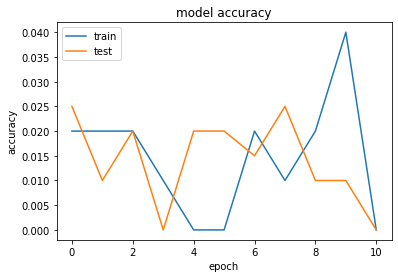

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model.save('/content/drive/MyDrive/ml lab/Converged Models/MobileNetV2.h5')

<h1>DenseNet121

In [ ]:
#DenseNet121
from keras.applications.densenet import DenseNet121
from keras.applications.densenet import preprocess_input
base_model = DenseNet121(weights="imagenet", include_top=False, input_shape=(220,220,3))
base_model.trainable = False ## Not trainable weights

29097984/29084464 [==============================] - 1s 0us/step


In [ ]:
#Buiding model
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(128, activation='relu')
dense_layer_2 = layers.Dense(256, activation='relu')
prediction_layer = layers.Dense(94, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [ ]:
#Compiling and training
from tensorflow.keras.callbacks import EarlyStopping

model.compile(    
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
#callbacks = myCallback()

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10,  restore_best_weights=True)

history = model.fit(
            train_generator,
            validation_data = test_generator,
            steps_per_epoch = 5,
            epochs = 100,
            validation_steps = 10,
            verbose = 2,
            callbacks=[es])

Epoch 1/100
5/5 - 13s - loss: 6.6317 - accuracy: 0.0100 - val_loss: 5.8162 - val_accuracy: 0.0100 - 13s/epoch - 3s/step
Epoch 2/100
5/5 - 5s - loss: 5.3964 - accuracy: 0.0100 - val_loss: 4.9050 - val_accuracy: 0.0450 - 5s/epoch - 1s/step
Epoch 3/100
5/5 - 5s - loss: 4.7381 - accuracy: 0.0800 - val_loss: 4.6135 - val_accuracy: 0.0600 - 5s/epoch - 993ms/step
Epoch 4/100
5/5 - 5s - loss: 4.5303 - accuracy: 0.0300 - val_loss: 4.4730 - val_accuracy: 0.0250 - 5s/epoch - 924ms/step
Epoch 5/100
5/5 - 6s - loss: 4.4641 - accuracy: 0.0200 - val_loss: 4.5230 - val_accuracy: 0.0300 - 6s/epoch - 1s/step
Epoch 6/100
5/5 - 6s - loss: 4.4949 - accuracy: 0.0300 - val_loss: 4.5822 - val_accuracy: 0.0250 - 6s/epoch - 1s/step
Epoch 7/100
5/5 - 5s - loss: 4.4472 - accuracy: 0.0600 - val_loss: 4.4478 - val_accuracy: 0.0400 - 5s/epoch - 986ms/step
Epoch 8/100
5/5 - 5s - loss: 4.4704 - accuracy: 0.0300 - val_loss: 4.4474 - val_accuracy: 0.0300 - 5s/epoch - 936ms/step
Epoch 9/100
5/5 - 5s - loss: 4.5283 - accu

In [ ]:
import pandas as pd
import h5py

hist_df = pd.DataFrame(history.history) 
hist_csv_file = '/content/drive/MyDrive/ml lab/Results(CSV)/DenseNet121.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

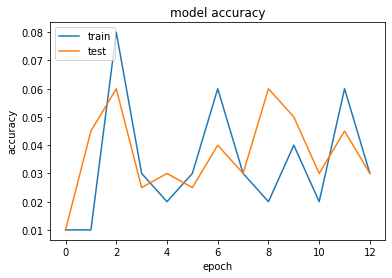

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model.save('/content/drive/MyDrive/ml lab/Converged Models/DenseNet121.h5')

<h1>DenseNet169

In [ ]:
#DenseNet169
from keras.applications.densenet import DenseNet169
from keras.applications.densenet import preprocess_input
base_model = DenseNet169(weights="imagenet", include_top=False, input_shape=(220,220,3))
base_model.trainable = False ## Not trainable weights

51888128/51877672 [==============================] - 2s 0us/step


In [ ]:
#Buiding model
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(128, activation='relu')
dense_layer_2 = layers.Dense(256, activation='relu')
prediction_layer = layers.Dense(94, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [ ]:
#Compiling and training
from tensorflow.keras.callbacks import EarlyStopping

model.compile(    
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
#callbacks = myCallback()

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10,  restore_best_weights=True)

history = model.fit(
            train_generator,
            validation_data = test_generator,
            steps_per_epoch = 5,
            epochs = 100,
            validation_steps = 10,
            verbose = 2,
            callbacks=[es])

Epoch 1/100
5/5 - 16s - loss: 10.5937 - accuracy: 0.0000e+00 - val_loss: 8.6314 - val_accuracy: 0.0200 - 16s/epoch - 3s/step
Epoch 2/100
5/5 - 5s - loss: 7.7903 - accuracy: 0.0100 - val_loss: 5.9141 - val_accuracy: 0.0000e+00 - 5s/epoch - 988ms/step
Epoch 3/100
5/5 - 5s - loss: 5.2183 - accuracy: 0.0300 - val_loss: 4.9653 - val_accuracy: 0.0350 - 5s/epoch - 998ms/step
Epoch 4/100
5/5 - 5s - loss: 4.7029 - accuracy: 0.0100 - val_loss: 4.4721 - val_accuracy: 0.0300 - 5s/epoch - 982ms/step
Epoch 5/100
5/5 - 5s - loss: 4.4584 - accuracy: 0.0400 - val_loss: 4.4921 - val_accuracy: 0.0100 - 5s/epoch - 985ms/step
Epoch 6/100
5/5 - 5s - loss: 4.5002 - accuracy: 0.0100 - val_loss: 4.4992 - val_accuracy: 0.0150 - 5s/epoch - 1s/step
Epoch 7/100
5/5 - 5s - loss: 4.4868 - accuracy: 0.0600 - val_loss: 4.4678 - val_accuracy: 0.0250 - 5s/epoch - 1s/step
Epoch 8/100
5/5 - 6s - loss: 4.5374 - accuracy: 0.0200 - val_loss: 4.4872 - val_accuracy: 0.0150 - 6s/epoch - 1s/step
Epoch 9/100
5/5 - 5s - loss: 4.46

In [ ]:
import pandas as pd
import h5py

hist_df = pd.DataFrame(history.history) 
hist_csv_file = '/content/drive/MyDrive/ml lab/Results(CSV)/DenseNet169.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

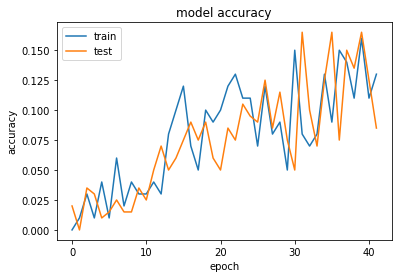

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model.save('/content/drive/MyDrive/ml lab/Converged Models/DenseNet169.h5')

<h1>DenseNet201

In [ ]:
#DenseNet201
from keras.applications.densenet import DenseNet201
from keras.applications.densenet import preprocess_input
base_model = DenseNet201(weights="imagenet", include_top=False, input_shape=(220,220,3))
base_model.trainable = False ## Not trainable weights

74850304/74836368 [==============================] - 2s 0us/step


In [ ]:
#Buiding model
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(128, activation='relu')
dense_layer_2 = layers.Dense(256, activation='relu')
prediction_layer = layers.Dense(94, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [ ]:
#Compiling and training
from tensorflow.keras.callbacks import EarlyStopping

model.compile(    
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
#callbacks = myCallback()

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10,  restore_best_weights=True)

history = model.fit(
            train_generator,
            validation_data = test_generator,
            steps_per_epoch = 5,
            epochs = 100,
            validation_steps = 10,
            verbose = 2,
            callbacks=[es])

Epoch 1/100
5/5 - 18s - loss: 8.1776 - accuracy: 0.0000e+00 - val_loss: 7.1351 - val_accuracy: 0.0250 - 18s/epoch - 4s/step
Epoch 2/100
5/5 - 5s - loss: 5.8228 - accuracy: 0.0600 - val_loss: 5.2360 - val_accuracy: 0.0300 - 5s/epoch - 1s/step
Epoch 3/100
5/5 - 5s - loss: 5.0287 - accuracy: 0.0500 - val_loss: 4.6414 - val_accuracy: 0.0200 - 5s/epoch - 1s/step
Epoch 4/100
5/5 - 5s - loss: 4.5619 - accuracy: 0.0200 - val_loss: 4.5399 - val_accuracy: 0.0100 - 5s/epoch - 962ms/step
Epoch 5/100
5/5 - 5s - loss: 4.5110 - accuracy: 0.0200 - val_loss: 4.5069 - val_accuracy: 0.0450 - 5s/epoch - 1s/step
Epoch 6/100
5/5 - 5s - loss: 4.5231 - accuracy: 0.0400 - val_loss: 4.5162 - val_accuracy: 0.0250 - 5s/epoch - 939ms/step
Epoch 7/100
5/5 - 5s - loss: 4.5423 - accuracy: 0.0200 - val_loss: 4.4676 - val_accuracy: 0.0300 - 5s/epoch - 945ms/step
Epoch 8/100
5/5 - 5s - loss: 4.5458 - accuracy: 0.0200 - val_loss: 4.4941 - val_accuracy: 0.0400 - 5s/epoch - 946ms/step
Epoch 9/100
5/5 - 5s - loss: 4.5130 - 

In [ ]:
import pandas as pd
import h5py

hist_df = pd.DataFrame(history.history) 
hist_csv_file = '/content/drive/MyDrive/ml lab/Results(CSV)/DenseNet201.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

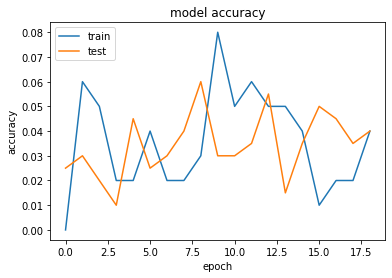

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model.save('/content/drive/MyDrive/ml lab/Converged Models/DenseNet201.h5')

<h1>ResNet50V2

In [ ]:
#ResNet50V2
from keras.applications.resnet_v2 import ResNet50V2
from keras.applications.resnet_v2 import preprocess_input
base_model = ResNet50V2(weights="imagenet", include_top=False, input_shape=(220,220,3))
base_model.trainable = False ## Not trainable weights

94683136/94668760 [==============================] - 2s 0us/step


In [ ]:
#Buiding model
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(128, activation='relu')
dense_layer_2 = layers.Dense(256, activation='relu')
prediction_layer = layers.Dense(94, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [ ]:
#Compiling and training
from tensorflow.keras.callbacks import EarlyStopping

model.compile(    
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
#callbacks = myCallback()

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10,  restore_best_weights=True)

history = model.fit(
            train_generator,
            validation_data = test_generator,
            steps_per_epoch = 5,
            epochs = 100,
            validation_steps = 10,
            verbose = 2,
            callbacks=[es])

Epoch 1/100
5/5 - 9s - loss: 7.7506 - accuracy: 0.0100 - val_loss: 7.2513 - val_accuracy: 0.0350 - 9s/epoch - 2s/step
Epoch 2/100
5/5 - 5s - loss: 6.3097 - accuracy: 0.0100 - val_loss: 5.0464 - val_accuracy: 0.0250 - 5s/epoch - 922ms/step
Epoch 3/100
5/5 - 5s - loss: 4.7560 - accuracy: 0.0000e+00 - val_loss: 4.7064 - val_accuracy: 0.0350 - 5s/epoch - 949ms/step
Epoch 4/100
5/5 - 5s - loss: 4.4813 - accuracy: 0.0500 - val_loss: 4.5647 - val_accuracy: 0.0350 - 5s/epoch - 947ms/step
Epoch 5/100
5/5 - 5s - loss: 4.5232 - accuracy: 0.0400 - val_loss: 4.5206 - val_accuracy: 0.0450 - 5s/epoch - 980ms/step
Epoch 6/100
5/5 - 5s - loss: 4.5448 - accuracy: 0.0500 - val_loss: 4.5835 - val_accuracy: 0.0250 - 5s/epoch - 995ms/step
Epoch 7/100
5/5 - 5s - loss: 4.5126 - accuracy: 0.0400 - val_loss: 4.5917 - val_accuracy: 0.0400 - 5s/epoch - 969ms/step
Epoch 8/100
5/5 - 5s - loss: 4.5974 - accuracy: 0.0200 - val_loss: 4.5222 - val_accuracy: 0.0250 - 5s/epoch - 960ms/step
Epoch 9/100
5/5 - 5s - loss: 4.

In [ ]:
import pandas as pd
import h5py

hist_df = pd.DataFrame(history.history) 
hist_csv_file = '/content/drive/MyDrive/ml lab/Results(CSV)/ResNet50V2.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

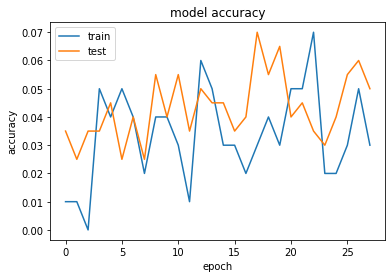

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model.save('/content/drive/MyDrive/ml lab/Converged Models/ResNet50V2.h5')

<h1>ResNet101

In [ ]:
#ResNet101
from keras.applications.resnet import ResNet101
from keras.applications.resnet import preprocess_input
base_model = ResNet101(weights="imagenet", include_top=False, input_shape=(220,220,3))
base_model.trainable = False ## Not trainable weights

171458560/171446536 [==============================] - 1s 0us/step


In [ ]:
#Buiding model
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(128, activation='relu')
dense_layer_2 = layers.Dense(256, activation='relu')
prediction_layer = layers.Dense(94, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [ ]:
#Compiling and training
from tensorflow.keras.callbacks import EarlyStopping

model.compile(    
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
#callbacks = myCallback()

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10,  restore_best_weights=True)

history = model.fit(
            train_generator,
            validation_data = test_generator,
            steps_per_epoch = 5,
            epochs = 100,
            validation_steps = 10,
            verbose = 2,
            callbacks=[es])

Epoch 1/100
5/5 - 13s - loss: 8.9534 - accuracy: 0.0100 - val_loss: 6.3014 - val_accuracy: 0.0150 - 13s/epoch - 3s/step
Epoch 2/100
5/5 - 5s - loss: 5.7761 - accuracy: 0.0000e+00 - val_loss: 4.5852 - val_accuracy: 0.0000e+00 - 5s/epoch - 1s/step
Epoch 3/100
5/5 - 5s - loss: 4.5410 - accuracy: 0.0000e+00 - val_loss: 4.5431 - val_accuracy: 0.0150 - 5s/epoch - 990ms/step
Epoch 4/100
5/5 - 5s - loss: 4.5473 - accuracy: 0.0100 - val_loss: 4.5430 - val_accuracy: 0.0250 - 5s/epoch - 1s/step
Epoch 5/100
5/5 - 5s - loss: 4.5432 - accuracy: 0.0100 - val_loss: 4.5417 - val_accuracy: 0.0250 - 5s/epoch - 1000ms/step
Epoch 6/100
5/5 - 5s - loss: 4.5678 - accuracy: 0.0100 - val_loss: 4.5441 - val_accuracy: 0.0050 - 5s/epoch - 1s/step
Epoch 7/100
5/5 - 5s - loss: 4.5435 - accuracy: 0.0000e+00 - val_loss: 4.5424 - val_accuracy: 0.0150 - 5s/epoch - 988ms/step
Epoch 8/100
5/5 - 5s - loss: 4.5430 - accuracy: 0.0200 - val_loss: 4.5430 - val_accuracy: 0.0000e+00 - 5s/epoch - 997ms/step
Epoch 9/100
5/5 - 5s 

In [ ]:
import pandas as pd
import h5py

hist_df = pd.DataFrame(history.history) 
hist_csv_file = '/content/drive/MyDrive/ml lab/Results(CSV)/ResNet101.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

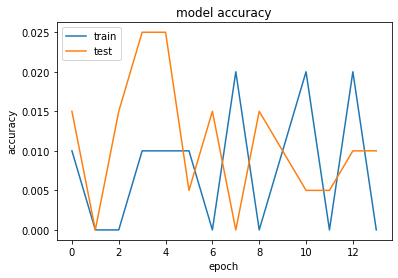

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model.save('/content/drive/MyDrive/ml lab/Converged Models/ResNet101.h5')

<h1>ResNet50

In [9]:
#ResNet50
from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(220,220,3))
base_model.trainable = False ## Not trainable weightsfrom keras.applications.resnet_v2 import ResNet50V2


94781440/94765736 [==============================] - 1s 0us/step


In [10]:
#Buiding model
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(128, activation='relu')
dense_layer_2 = layers.Dense(256, activation='relu')
prediction_layer = layers.Dense(94, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [12]:
#Compiling and training
from tensorflow.keras.callbacks import EarlyStopping

model.compile(    
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
#callbacks = myCallback()

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10,  restore_best_weights=True)

history = model.fit(
            train_generator,
            validation_data = test_generator,
            steps_per_epoch = 5,
            epochs = 100,
            validation_steps = 10,
            verbose = 2,
            callbacks=[es])

Epoch 1/100
5/5 - 43s - loss: 4.6367 - accuracy: 0.0000e+00 - val_loss: 4.5429 - val_accuracy: 0.0100 - 43s/epoch - 9s/step
Epoch 2/100
5/5 - 28s - loss: 4.5442 - accuracy: 0.0000e+00 - val_loss: 4.5440 - val_accuracy: 0.0100 - 28s/epoch - 6s/step
Epoch 3/100
5/5 - 29s - loss: 4.5442 - accuracy: 0.0100 - val_loss: 4.5839 - val_accuracy: 0.0150 - 29s/epoch - 6s/step
Epoch 4/100
5/5 - 28s - loss: 4.5474 - accuracy: 0.0000e+00 - val_loss: 4.5421 - val_accuracy: 0.0050 - 28s/epoch - 6s/step
Epoch 5/100
5/5 - 26s - loss: 4.5437 - accuracy: 0.0000e+00 - val_loss: 4.5434 - val_accuracy: 0.0050 - 26s/epoch - 5s/step
Epoch 6/100
5/5 - 24s - loss: 4.5424 - accuracy: 0.0300 - val_loss: 4.5431 - val_accuracy: 0.0300 - 24s/epoch - 5s/step
Epoch 7/100
5/5 - 22s - loss: 4.5421 - accuracy: 0.0100 - val_loss: 4.5427 - val_accuracy: 0.0150 - 22s/epoch - 4s/step
Epoch 8/100
5/5 - 21s - loss: 4.5426 - accuracy: 0.0300 - val_loss: 4.5425 - val_accuracy: 0.0150 - 21s/epoch - 4s/step
Epoch 9/100
5/5 - 22s - 

In [13]:
import pandas as pd
import h5py

hist_df = pd.DataFrame(history.history) 
hist_csv_file = '/content/drive/MyDrive/ml lab/Results(CSV)/ResNet50.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

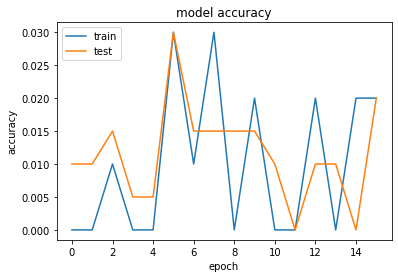

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model.save('/content/drive/MyDrive/ml lab/Converged Models/ResNet50.h5')

<h1>ResNet101V2

In [ ]:
#ResNet101V2
from keras.applications.resnet_v2 import ResNet101V2
from keras.applications.resnet_v2 import preprocess_input
base_model = ResNet101V2(weights="imagenet", include_top=False, input_shape=(220,220,3))
base_model.trainable = False ## Not trainable weightsfrom keras.applications.resnet_v2 import ResNet50V2


171327488/171317808 [==============================] - 3s 0us/step


In [ ]:
#Buiding model
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(128, activation='relu')
dense_layer_2 = layers.Dense(256, activation='relu')
prediction_layer = layers.Dense(94, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [ ]:
#Compiling and training
from tensorflow.keras.callbacks import EarlyStopping

model.compile(    
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
#callbacks = myCallback()

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10,  restore_best_weights=True)

history = model.fit(
            train_generator,
            validation_data = test_generator,
            steps_per_epoch = 5,
            epochs = 100,
            validation_steps = 10,
            verbose = 2,
            callbacks=[es])

Epoch 1/100
5/5 - 14s - loss: 11.3571 - accuracy: 0.0100 - val_loss: 10.1431 - val_accuracy: 0.0150 - 14s/epoch - 3s/step
Epoch 2/100
5/5 - 5s - loss: 7.6003 - accuracy: 0.0400 - val_loss: 6.5888 - val_accuracy: 0.0200 - 5s/epoch - 1s/step
Epoch 3/100
5/5 - 5s - loss: 5.4747 - accuracy: 0.0500 - val_loss: 5.0645 - val_accuracy: 0.0400 - 5s/epoch - 1s/step
Epoch 4/100
5/5 - 5s - loss: 4.9033 - accuracy: 0.0100 - val_loss: 4.8286 - val_accuracy: 0.0350 - 5s/epoch - 989ms/step
Epoch 5/100
5/5 - 5s - loss: 4.7656 - accuracy: 0.0500 - val_loss: 4.4559 - val_accuracy: 0.0350 - 5s/epoch - 1s/step
Epoch 6/100
5/5 - 5s - loss: 4.5170 - accuracy: 0.0200 - val_loss: 4.4619 - val_accuracy: 0.0300 - 5s/epoch - 990ms/step
Epoch 7/100
5/5 - 5s - loss: 4.5775 - accuracy: 0.0300 - val_loss: 4.4679 - val_accuracy: 0.0350 - 5s/epoch - 996ms/step
Epoch 8/100
5/5 - 5s - loss: 4.3918 - accuracy: 0.0600 - val_loss: 4.4386 - val_accuracy: 0.0300 - 5s/epoch - 987ms/step
Epoch 9/100
5/5 - 5s - loss: 4.4477 - ac

In [ ]:
import pandas as pd
import h5py

hist_df = pd.DataFrame(history.history) 
hist_csv_file = '/content/drive/MyDrive/ml lab/Results(CSV)/ResNet101V2.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

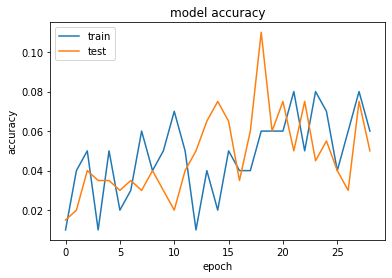

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model.save('/content/drive/MyDrive/ml lab/Converged Models/ResNet101V2.h5')

<h1>ResNet152V2

In [ ]:
#ResNet152V2
from keras.applications.resnet_v2 import ResNet152V2
from keras.applications.resnet_v2 import preprocess_input
base_model = ResNet152V2(weights="imagenet", include_top=False, input_shape=(220,220,3))
base_model.trainable = False ## Not trainable weightsfrom keras.applications.resnet_v2 import ResNet50V2


234561536/234545216 [==============================] - 7s 0us/step


In [ ]:
#Buiding model
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(128, activation='relu')
dense_layer_2 = layers.Dense(256, activation='relu')
prediction_layer = layers.Dense(94, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [ ]:
#Compiling and training
from tensorflow.keras.callbacks import EarlyStopping

model.compile(    
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
#callbacks = myCallback()

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10,  restore_best_weights=True)

history = model.fit(
            train_generator,
            validation_data = test_generator,
            steps_per_epoch = 5,
            epochs = 100,
            validation_steps = 10,
            verbose = 2,
            callbacks=[es])

Epoch 1/100
5/5 - 17s - loss: 7.9889 - accuracy: 0.0400 - val_loss: 7.5772 - val_accuracy: 0.0450 - 17s/epoch - 3s/step
Epoch 2/100
5/5 - 5s - loss: 6.8369 - accuracy: 0.0300 - val_loss: 5.5591 - val_accuracy: 0.0350 - 5s/epoch - 1s/step
Epoch 3/100
5/5 - 6s - loss: 5.0263 - accuracy: 0.0400 - val_loss: 4.7593 - val_accuracy: 0.0200 - 6s/epoch - 1s/step
Epoch 4/100
5/5 - 5s - loss: 4.5307 - accuracy: 0.0200 - val_loss: 4.5641 - val_accuracy: 0.0050 - 5s/epoch - 1s/step
Epoch 5/100
5/5 - 5s - loss: 4.4950 - accuracy: 0.0700 - val_loss: 4.6138 - val_accuracy: 0.0200 - 5s/epoch - 1s/step
Epoch 6/100
5/5 - 5s - loss: 4.6006 - accuracy: 0.0100 - val_loss: 4.5484 - val_accuracy: 0.0150 - 5s/epoch - 1s/step
Epoch 7/100
5/5 - 5s - loss: 4.4395 - accuracy: 0.0300 - val_loss: 4.5504 - val_accuracy: 0.0350 - 5s/epoch - 1s/step
Epoch 8/100
5/5 - 5s - loss: 4.5698 - accuracy: 0.0000e+00 - val_loss: 4.4824 - val_accuracy: 0.0300 - 5s/epoch - 1s/step
Epoch 9/100
5/5 - 5s - loss: 4.5412 - accuracy: 0.

In [ ]:
import pandas as pd
import h5py

hist_df = pd.DataFrame(history.history) 
hist_csv_file = '/content/drive/MyDrive/ml lab/Results(CSV)/ResNet152V2.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

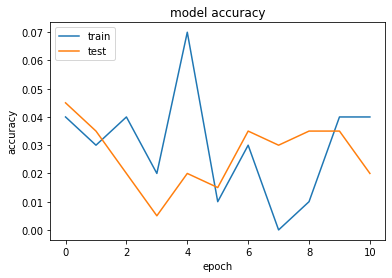

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model.save('/content/drive/MyDrive/ml lab/Converged Models/ResNet152V2.h5')